# COGS 181 Final Project on self-generated dataset

### Yushan Wang A14459085
### Jiemin Tang A13948547

### Import package

In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from random import randint

# It should print "Using TensorFlow backend"

Using TensorFlow backend.


### Helper function

In [2]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)

### Initialize path directories for dataset

In [3]:
# paths for thw two dataset folders
mask = r'dataset/with_mask'
no_mask = r'dataset/without_mask'

### Load and Store images

In [4]:
width = 100
height = 100
dim = (160, 160)
data= []
images = []
for file in list(os.listdir(mask)):
    img = cv2.imread(mask+'/'+file)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
    resized=cv2.resize(gray,(width,height))
    images.append(img)
    data.append(resized)
    
for file in list(os.listdir(no_mask)):
    img = cv2.imread(no_mask+'/'+file)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    resized=cv2.resize(gray,(width,height))
    images.append(img) 
    data.append(resized)
    
images = np.array(images)
data = np.array(data)
data = data/255.0
data = np.reshape(data, (data.shape[0], width, height,1))

### One-hot encoding for mask/no-mask

In [5]:
# store labels (mask = 1,0 and  no mask = 0,1)
n_mask = len(list(os.listdir(mask)))
n_no_mask = len(list(os.listdir(no_mask)))
labels = np.zeros(( n_mask  + n_no_mask, 2  ))
labels[:n_mask,0] = 1
labels[n_mask:,1] = 1
print('y shape',labels.shape)   #(1376, 2)
print('x shape',images.shape)   #(1376, 100, 100, 3)
print('data shape', data.shape)

y shape (1376, 2)
x shape (1376, 160, 160, 3)
data shape (1376, 100, 100, 1)


### shuffle and split data

In [6]:
data_size = labels.shape[0]
index = list(range(data_size))
shuffle(index)
index = np.array(index)
images =   images[index]
labels =   labels[index,:]
x_train =  data[:int(0.8*data_size)]
y_train =  labels[:int(0.8*data_size),:] 
image_train = images[:int(0.8*data_size)]

x_test =   data[int(0.8*data_size):]
y_test =   labels[int(0.8*data_size):,:]
image_test = images[int(0.8*data_size):]

### Preview data
#### Show random image with corresponding label

Without Mask


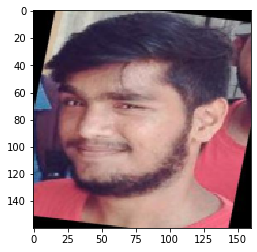

In [7]:
rand_int = randint(0, len(image_test))
plt.imshow(image_test[rand_int][:,:,::-1])
print((np.array(['With Mask','Without Mask'])[y_test[rand_int] == 1])[0])

### Initialize model parameters

In [8]:
img_rows, img_cols = images.shape[1], images.shape[2]
batch_size = 1
num_classes = 2

### Create Model

In [9]:
model = Sequential()
model.add(Conv2D(200, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=data.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(200, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 200)       180200    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 200)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 200)      

### Train the model

In [11]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 1100 samples, validate on 276 samples
Epoch 1/20
1100/1100 [==============================] - 96s 87ms/step - loss: 0.6936 - accuracy: 0.5018 - val_loss: 0.6943 - val_accuracy: 0.4819
Epoch 2/20
1100/1100 [==============================] - 96s 87ms/step - loss: 0.7433 - accuracy: 0.5055 - val_loss: 0.6991 - val_accuracy: 0.4819
Epoch 3/20
1100/1100 [==============================] - 95s 87ms/step - loss: 0.6940 - accuracy: 0.5055 - val_loss: 0.6933 - val_accuracy: 0.4819
Epoch 4/20
1100/1100 [==============================] - 97s 89ms/step - loss: 0.6934 - accuracy: 0.5082 - val_loss: 0.6927 - val_accuracy: 0.5181
Epoch 5/20
1100/1100 [==============================] - 134s 121ms/step - loss: 0.6937 - accuracy: 0.4945 - val_loss: 0.6941 - val_accuracy: 0.4819
Epoch 6/20
1100/1100 [==============================] - 203s 185ms/step - loss: 0.6937 - accuracy: 0.4955 - val_loss: 0.6936 - val_accuracy: 0.4819
Epoch 7/20
1100/1100 [==============================] - 229s 209ms/step -

KeyboardInterrupt: 

### Evaluate the model

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6936476196067921
Test accuracy: 0.48188406229019165


### Test the model

In [17]:
rand = randint(0, 270)
m = model.predict(x_test[rand].reshape(-1,100,100,1)) == model.predict(x_test[rand].reshape(-1,100,100,1)).max()
#plt.imshow(x_test[rand][-1,100,100,1])
print(np.array(['With Mask','Without Mask'])[m[0]])

['With Mask']


### Save the model

In [32]:
modelsave_name = 'SELF_DATASET_face_mask.h5'
model.save(modelsave_name)